<a href="https://colab.research.google.com/github/1adityakadam/Weather-History-Data-Analysis-and-Predictive-Modeling/blob/main/weatherhistory_hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question A - Summarization


---


How much data is present?

There are 96,453 rows and 12 columns in the dataset.


---


What attributes/features are continuous valued?

The continuous valued attributes are: Temperature (C), Apparent Temperature (C), Humidity, Wind Speed (km/h), Wind Bearing (degrees), Visibility (km), Pressure (millibars).


---


Which attributes are categorical?

The categorical attributes are: Formatted Date (treated categorically depending on analysis), Summary, Precip Type, Daily Summary.


---



In [ ]:
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import make_classification

In [ ]:
weatherHistory_data = pd.read_csv('weatherHistory.csv')

df = pd.DataFrame(weatherHistory_data)

print('DATA DESCRIPTION \n')

num_rows, num_columns = weatherHistory_data.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

print(df.describe(include='all'))

# include_all shows summary for categorical data and continuous data
# continuous data shows min, 25%,50% etc.
# categorical data shows count, unique, top, and freq.

df['Formatted Date'] = df['Formatted Date'].astype('category')
df['Summary'] = df['Summary'].astype('category')
df['Precip Type'] = df['Precip Type'].astype('category')
df['Daily Summary'] = df['Daily Summary'].astype('category')

# explicitely converting country name to category data type

DATA DESCRIPTION 

Number of rows: 80302
Number of columns: 12
                       Formatted Date        Summary Precip Type  \
count                           80302          80302       80159   
unique                          80278             26           2   
top     2010-08-02 04:00:00.000 +0200  Partly Cloudy        rain   
freq                                2          26688       70764   
mean                              NaN            NaN         NaN   
std                               NaN            NaN         NaN   
min                               NaN            NaN         NaN   
25%                               NaN            NaN         NaN   
50%                               NaN            NaN         NaN   
75%                               NaN            NaN         NaN   
max                               NaN            NaN         NaN   

        Temperature (C)  Apparent Temperature (C)      Humidity  \
count      80302.000000              80302.000000  80

In [ ]:
weatherHistory_data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [ ]:
print('SUMMARIZED DATA \n')
print(df.info())

# this shows that there are 96453 entries and 12 columns

SUMMARIZED DATA 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80302 entries, 0 to 80301
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Formatted Date            80302 non-null  category
 1   Summary                   80302 non-null  category
 2   Precip Type               80159 non-null  category
 3   Temperature (C)           80302 non-null  float64 
 4   Apparent Temperature (C)  80302 non-null  float64 
 5   Humidity                  80302 non-null  float64 
 6   Wind Speed (km/h)         80302 non-null  float64 
 7   Wind Bearing (degrees)    80301 non-null  float64 
 8   Visibility (km)           80301 non-null  float64 
 9   Loud Cover                80301 non-null  float64 
 10  Pressure (millibars)      80301 non-null  float64 
 11  Daily Summary             80301 non-null  category
dtypes: category(4), float64(8)
memory usage: 8.1 MB
None



# Question B - Visualization and summary statistics

Visualization and summary statistics

### Noticeable Traits of Key Attributes

1. **Temperature (C):**
   - Bell-shaped distributions, suggesting normality.
   - Peaks around 0-10°C.

2. **Apparent Temperature (C):**
   - Bell-shaped distributions, suggesting normality.
   - Peaks around 10-20°C.

3. **Humidity:**
   - Left-skewed distribution.
   - Peak near 0.9.

4. **Wind Speed (km/h):**
   - Right-skewed with a peak around 0-10 km/h.

5. **Wind Bearing (degrees):**
   - Multimodal distribution with peaks at several degrees around 0, 150 and 300.

6. **Visibility (km):**
   - Significant peak around 10 km, with some left skewness.

7. **Loud Cover:**
Distribution is highly concentrated around 0.
Indicates little to no variation.

8. **Pressure (millibars):**
Left-skewed distribution with a peak near 1000 millibars.


### Special Treatment Considerations

Special Treatment:
Temperature (C) and Apparent Temperature (C)
Treatment: No special treatment needed as they exhibit a normal distribution.

Humidity
Treatment: Consider applying a logarithmic or Box-Cox transformation to address left skewness and achieve normality, if needed.

Wind Speed (km/h)
Treatment: Consider transformations like square root or logarithmic to address right skewness, if needed.

Wind Bearing (degrees)
Treatment: Use circular statistical methods due to its cyclical nature, such as circular mean and variance if needed.

Visibility (km)
Treatment: Apply logarithmic transformations to reduce left skewness, if needed.

Loud Cover
Treatment: No variation observed, so no special treatment is necessary.

Pressure (millibars)
Treatment: A logarithmic transformation to address left skewness and normalize the distribution if needed.

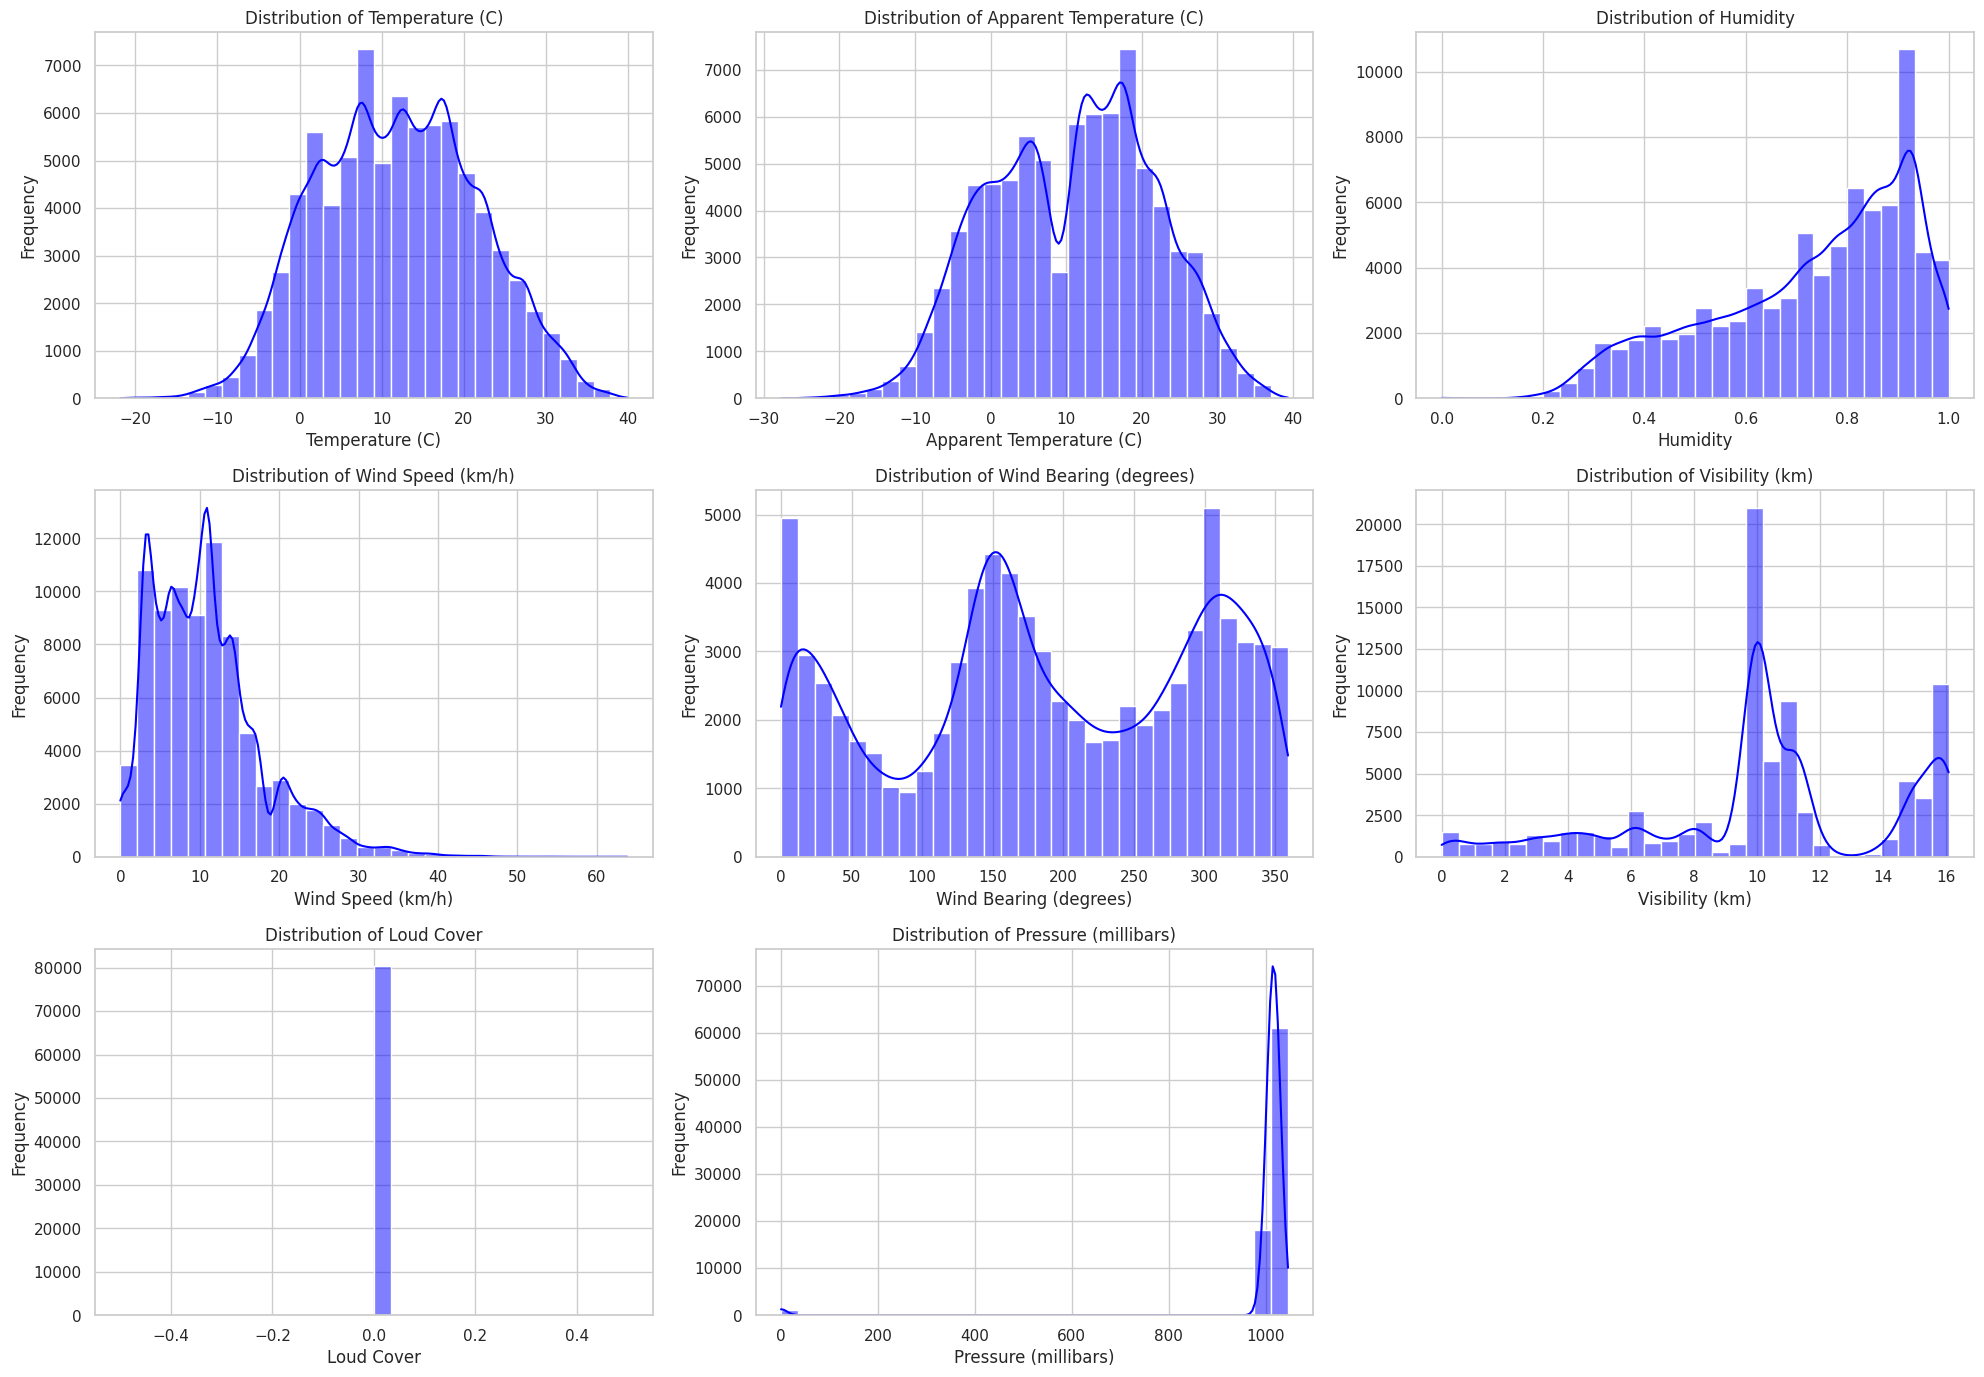

In [ ]:
# Set the style for seaborn
sns.set(style="whitegrid")

# List of columns to plot
columns = weatherHistory_data.columns[3:11]  # Excluded categorical type

# Set up the matplotlib figure
plt.figure(figsize=(20, 18))

# Loop through each column and create a histogram
for i, column in enumerate(columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(weatherHistory_data[column], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

For feature scaling of data we use Standard Scaler funtion

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply the scaler to columns 3 to 11 (excluding the 12th column)
scaled_columns = scaler.fit_transform(weatherHistory_data.iloc[:, 3:11])

# Create a new DataFrame with the scaled values
scaled_df = pd.DataFrame(scaled_columns, columns=weatherHistory_data.columns[3:11])

# Add back the unscaled columns 'Formatted Date', 'Summary', 'Precip Type', 'Daily Summary'
scaled_df = pd.concat([weatherHistory_data[['Formatted Date', 'Summary', 'Precip Type', 'Daily Summary']], scaled_df], axis=1)

# Display the first few rows of the scaled DataFrame
print(scaled_df.head())


                  Formatted Date        Summary Precip Type  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain   

                       Daily Summary  Temperature (C)  \
0  Partly cloudy throughout the day.        -0.260198   
1  Partly cloudy throughout the day.        -0.272308   
2  Partly cloudy throughout the day.        -0.270001   
3  Partly cloudy throughout the day.        -0.383022   
4  Partly cloudy throughout the day.        -0.334585   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                 -0.326380  0.810662           0.469412   
1                 -0.341324  0.658533           0.490116   
2                 -0.141896  0.810662          -0.986799   
3                 -0.460363  0.506404 

In [ ]:
# Get the number of rows and columns
num_rows, num_columns = scaled_df.shape

# Get a statistical summary of the numerical columns
scaled_df_summary = scaled_df.describe(include='all')

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")
print("\nStatistical Summary:")
print(scaled_df_summary)

Number of rows: 80302
Number of columns: 12

Statistical Summary:
                       Formatted Date        Summary Precip Type  \
count                           80302          80302       80159   
unique                          80278             26           2   
top     2010-08-02 04:00:00.000 +0200  Partly Cloudy        rain   
freq                                2          26688       70764   
mean                              NaN            NaN         NaN   
std                               NaN            NaN         NaN   
min                               NaN            NaN         NaN   
25%                               NaN            NaN         NaN   
50%                               NaN            NaN         NaN   
75%                               NaN            NaN         NaN   
max                               NaN            NaN         NaN   

                            Daily Summary  Temperature (C)  \
count                               80301     8.030200e

Visualization after feature scaling

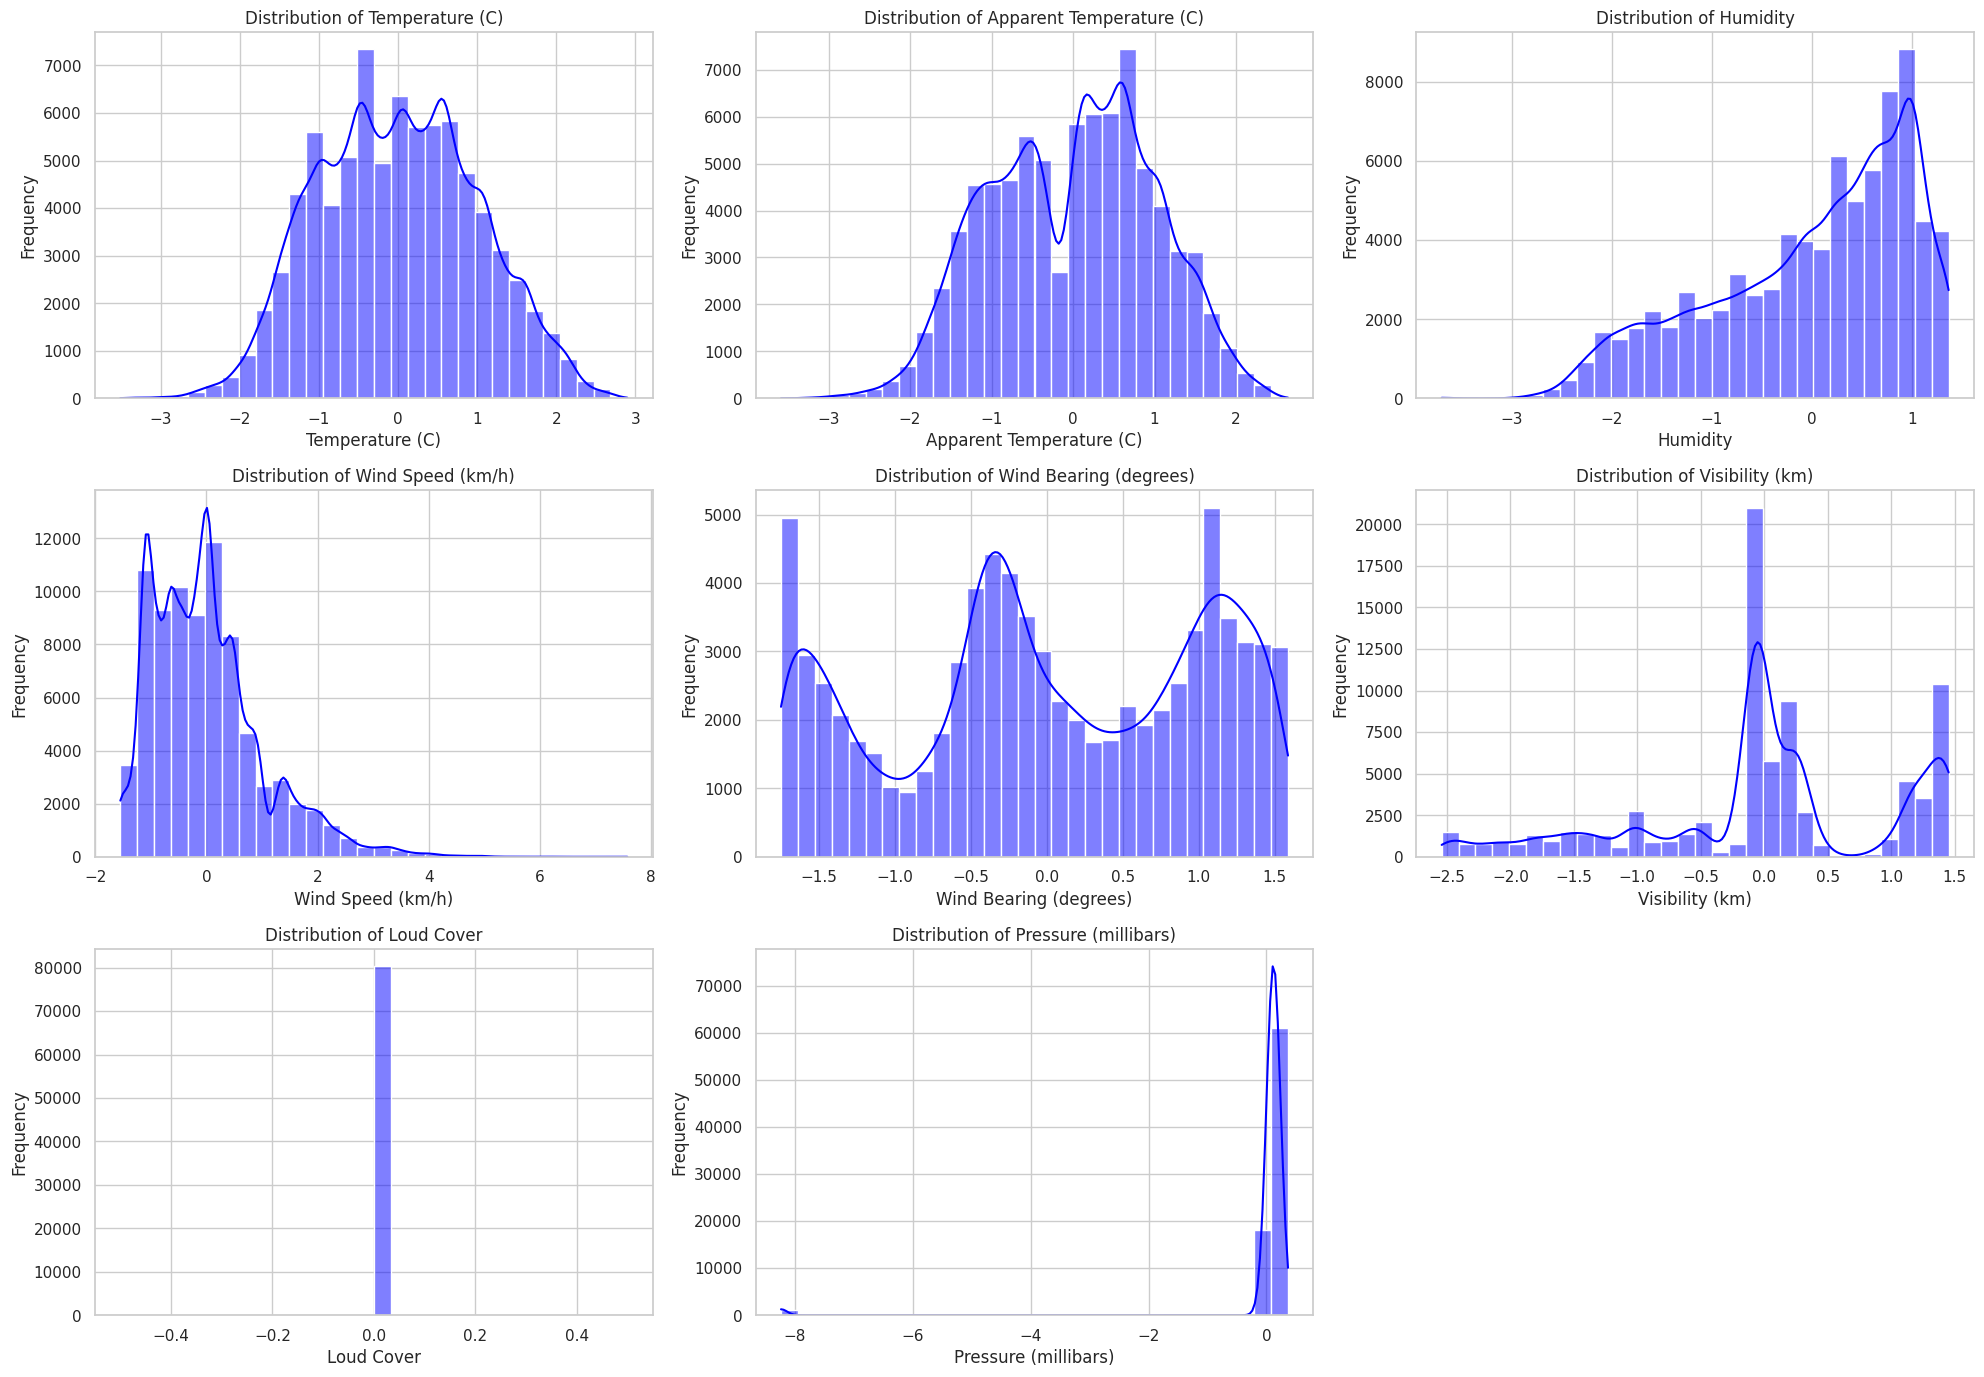

In [ ]:
# Set the style for seaborn
sns.set(style="whitegrid")

# List of columns to plot
columns = scaled_df.columns[4:12]

# Set up the matplotlib figure
plt.figure(figsize=(20, 18))

# Loop through each column and create a histogram
for i, column in enumerate(columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(scaled_df[column], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

# Question C - Correlation


---


PCC table has been computed.

Scatter Plots

Discussion


---

.

The Pearson Correlation Coefficient (PCC) analysis provides insights into the relationships between various weather variables. Here's a summary based on the images provided:

.

*PCC Matrix (Heatmap)*

.

Temperature and Apparent Temperature:
Strong positive correlation (0.99), indicating they move together closely.

Temperature and Humidity:
Moderate negative correlation (-0.63), suggesting higher temperatures are associated with lower humidity.

Temperature and Visibility:
Positive correlation (0.39), indicating better visibility at higher temperatures.

Other Variables:
Weak correlations with temperature, such as wind speed (0.01), wind bearing (0.03), and pressure (-0.01).

.

*Scatter Plots*

.

Apparent Temperature vs. Temperature:
Strong linear relationship, confirming the high correlation.

Humidity vs. Temperature:
Negative trend, aligning with the negative correlation.

Wind Speed, Wind Bearing, and Pressure vs. Temperature:
Show little to no trend, reflecting weak correlations.

Visibility vs. Temperature:
Slight positive trend, consistent with the moderate positive correlation.

These analyses illustrate how temperature is most strongly related to apparent temperature and humidity among the variables considered.


---



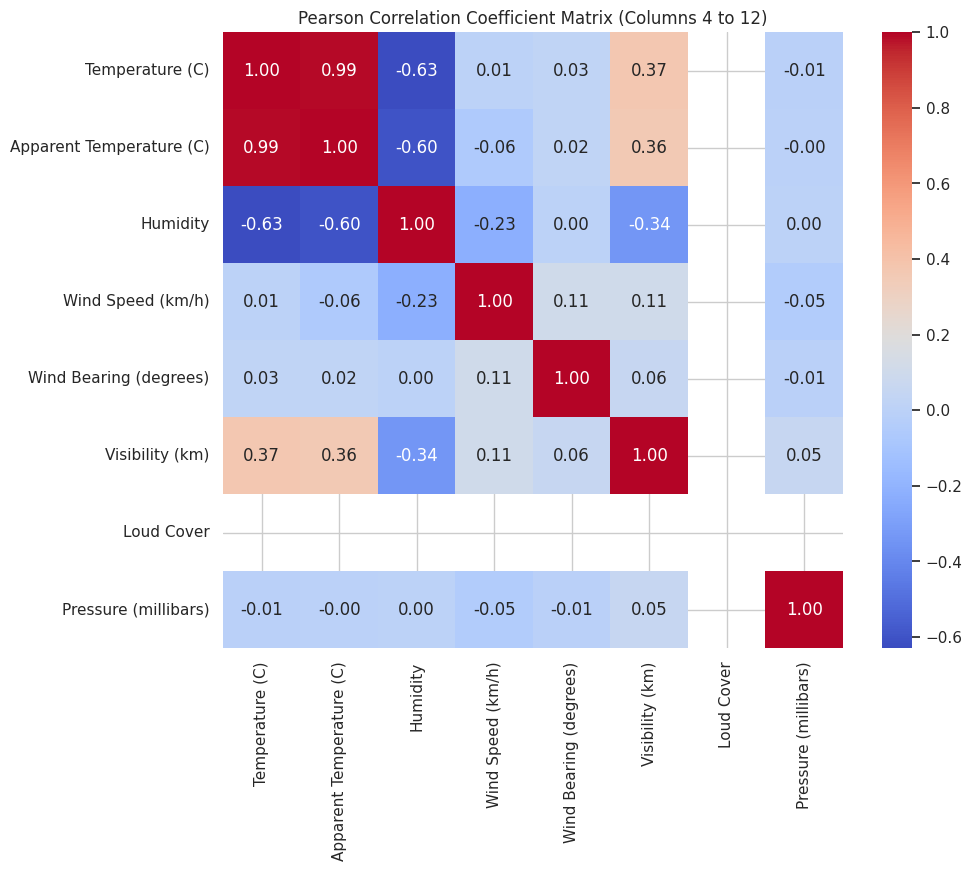

In [ ]:
# Select columns 4 to 12 from scaled_df (assuming Python 0-based indexing)
selected_columns = scaled_df.iloc[:, 4:13]  # 3rd index for 4th column to 11th index for 12th column

# Compute the Pearson Correlation Coefficient matrix for the selected columns
correlation_matrix = selected_columns.corr()

# Display the correlation matrix using a heatmap for better visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Pearson Correlation Coefficient Matrix (Columns 4 to 12)')
plt.show()

Pearson correlation between Apparent Temperature (C) and Temperature (C): 0.99 

Pearson correlation between Humidity and Temperature (C): -0.63 

Pearson correlation between Wind Speed (km/h) and Temperature (C): 0.01 

Pearson correlation between Wind Bearing (degrees) and Temperature (C): 0.03 

Pearson correlation between Visibility (km) and Temperature (C): 0.37 

Pearson correlation between Loud Cover and Temperature (C): nan 

Pearson correlation between Pressure (millibars) and Temperature (C): -0.01 



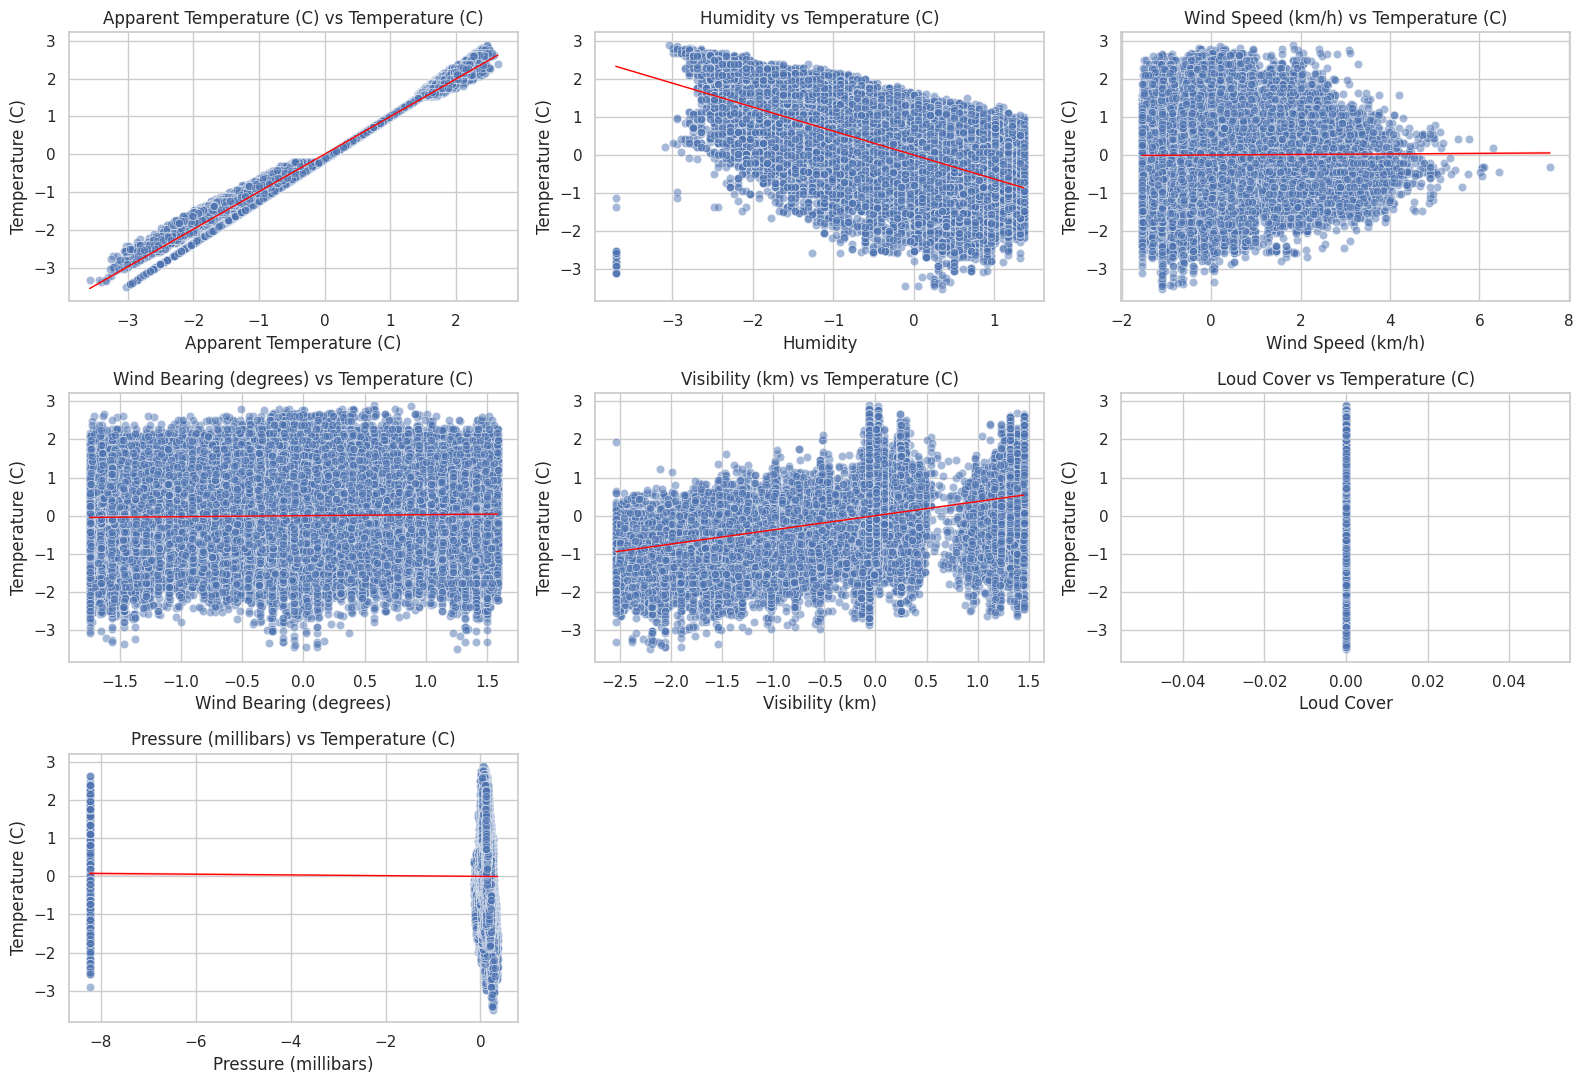

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# List of attributes to analyze
attributes = [
    'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
    'Wind Bearing (degrees)', 'Visibility (km)',
    'Loud Cover', 'Pressure (millibars)'
    ]

# Define the target variable
target_column = 'Temperature (C)'

# Missing values check
scaled_df = scaled_df.dropna(subset=[target_column] + attributes)
scaled_df[attributes + [target_column]] = scaled_df[attributes + [target_column]].apply(pd.to_numeric, errors='coerce')

# Calculate Pearson correlation coefficients and display results
for attribute in attributes:
    if scaled_df[attribute].isnull().any() or scaled_df[target_column].isnull().any():
        print(f'Cannot calculate PCC for {attribute} due to missing values.')
    else:
        corr, _ = pearsonr(scaled_df[attribute], scaled_df[target_column])
        print(f'Pearson correlation between {attribute} and {target_column}: {corr:.2f} \n')

# Set the style for seaborn
sns.set(style="whitegrid")

# Create a figure for scatter plots
plt.figure(figsize=(16, 11))

# Plot scatter plots with regression line for each attribute against the target variable
for i, attribute in enumerate(attributes):
    plt.subplot(3, 3, i + 1)  # Adjust subplot grid as needed
    sns.scatterplot(x=scaled_df[attribute], y=scaled_df[target_column], alpha=0.5)
    sns.regplot(x=scaled_df[attribute], y=scaled_df[target_column], scatter=False, color='red', line_kws={"linewidth": 1})
    plt.title(f'{attribute} vs {target_column}')
    plt.xlabel(attribute)
    plt.ylabel(target_column)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


# Question D - Splitting - Test/Train

Correctly splitting into test/train

Verification

To select 25% of the dataset for testing, I used the train_test_split function from the sklearn.model_selection module. This function splits the data into training and testing sets based on a specified proportion. In this case, I set the test size to 25%, which means 75% of the data is used for training and 25% is used for testing. Additionally, I used stratified sampling to ensure that the 'Temperature (C)' distribution remains consistent between the training and test sets. This approach ensures that both sets are representative of the entire dataset in terms of the target variable.

After splitting the data, I verified that the test portion is representative by comparing the statistical properties (mean and standard deviation) of the 'Temperature (C)' column in the training and test sets.

The means and standard deviations of 'Temperature (C)' in the training and test sets are very close, indicating that the test set is representative of the entire dataset. This was further ensured through the stratification process, which preserved the distribution of the target variable across both sets.

Additionally, plotting the distributions of the target variable in both the training and test sets showed similar patterns, confirming that the test set is representative.

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Define bins for stratification based on 'Temperature (C)'
bins = pd.qcut(scaled_df['Temperature (C)'], q=5, labels=False)  # Adjust bins to 5 for close mean and std dev values

# Split the data into training and testing sets using stratification
train_data, test_data = train_test_split(scaled_df, test_size=0.25, random_state=42, stratify=bins)

# Verify that the test set is representative
print("Training set size:", len(train_data))
print("Test set size:", len(test_data))

# Check the distribution of 'Temperature (C)' in both sets
print("\nTraining set 'Temperature (C)' mean:", train_data['Temperature (C)'].mean())
print("Test set 'Temperature (C)' mean:", test_data['Temperature (C)'].mean())

print("\nTraining set 'Temperature (C)' std:", train_data['Temperature (C)'].std())
print("Test set 'Temperature (C)' std:", test_data['Temperature (C)'].std())


Training set size: 60225
Test set size: 20076

Training set 'Temperature (C)' mean: 0.00045411022233498335
Test set 'Temperature (C)' mean: -0.0014122339085154163

Training set 'Temperature (C)' std: 1.000545519746012
Test set 'Temperature (C)' std: 0.9984101036478179


# Question E Part 1 Regression
Linear Model using K-Fold with Normal form and SGD (train and val loss)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

# Define feature columns related to weather data
feature_columns = [
    'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
    'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover', 'Pressure (millibars)'
]

# Target column
target_column = 'Temperature (C)'

# Convert relevant columns to numeric, errors='coerce' will convert non-numeric values to NaN
for col in feature_columns + [target_column]:
    scaled_df[col] = pd.to_numeric(scaled_df[col], errors='coerce')

# Drop rows with NaN values in either features or target column
scaled_df = scaled_df.dropna(subset=feature_columns + [target_column])

# Define bins for stratification based on 'Temperature (C)'
bins = pd.qcut(scaled_df['Temperature (C)'], q=5, labels=False)

# Split the data into training and testing sets using stratification
train_data, test_data = train_test_split(scaled_df, test_size=0.20, random_state=42, stratify=bins)

# Verify that the test set is representative
print("Training set size:", len(train_data))
print("Test set size:", len(test_data))

print("\nTraining set 'Temperature (C)' mean:", train_data['Temperature (C)'].mean())
print("Test set 'Temperature (C)' mean:", test_data['Temperature (C)'].mean())

print("\nTraining set 'Temperature (C)' std:", train_data['Temperature (C)'].std())
print("Test set 'Temperature (C)' std:", test_data['Temperature (C)'].std())

# Split the training data into features (X) and target (y)
X_train = train_data[feature_columns]
print(f"X_train shape: {X_train.shape}")
print(f"X_train columns: {X_train.columns.tolist()}")

# Target variable
y_train = train_data[target_column]

# Add a column of ones to X_train for the intercept term (bias)
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]

# Convert to numpy arrays
X_train_b = X_train_b.astype(float)
y_train_np = y_train.values.astype(float)

# Closed-form solution for linear regression (Normal Equation)
theta_best = np.linalg.pinv(X_train_b.T.dot(X_train_b)).dot(X_train_b.T).dot(y_train_np)

# Display the coefficients
print("\nCoefficients:", theta_best)


Training set size: 64240
Test set size: 16061

Training set 'Temperature (C)' mean: 0.0005327166022622374
Test set 'Temperature (C)' mean: -0.002193196833108601

Training set 'Temperature (C)' std: 1.0006068672384136
Test set 'Temperature (C)' std: 0.9976281122556946
X_train shape: (64240, 7)
X_train columns: ['Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover', 'Pressure (millibars)']

Coefficients: [ 1.30292526e-04  9.77659171e-01 -2.94439440e-02  5.97306440e-02
 -4.85151717e-03  3.08730490e-03  0.00000000e+00 -2.36861694e-03]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error

# Assuming scaled_df is your DataFrame already loaded and preprocessed

# Define feature columns related to weather data
feature_columns = [
    'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
    'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover', 'Pressure (millibars)'
]

# Target column
target_column = 'Temperature (C)'

# Convert relevant columns to numeric, errors='coerce' will convert non-numeric values to NaN
for col in feature_columns + [target_column]:
    scaled_df[col] = pd.to_numeric(scaled_df[col], errors='coerce')

# Drop rows with NaN values in either features or target column
scaled_df.dropna(subset=feature_columns + [target_column], inplace=True)

# Define bins for stratification based on 'Temperature (C)'
bins = pd.qcut(scaled_df['Temperature (C)'], q=5, labels=False)

# Split the data into training and testing sets using stratification
train_data, test_data = train_test_split(scaled_df, test_size=0.20, random_state=42, stratify=bins)

# Verify that the test set is representative
print("Training set size:", len(train_data))
print("Test set size:", len(test_data))

print("\nTraining set 'Temperature (C)' mean:", train_data['Temperature (C)'].mean())
print("Test set 'Temperature (C)' mean:", test_data['Temperature (C)'].mean())

print("\nTraining set 'Temperature (C)' std:", train_data['Temperature (C)'].std())
print("Test set 'Temperature (C)' std:", test_data['Temperature (C)'].std())

# Split the training data into features (X) and target (y)
X_train = train_data[feature_columns].values.astype(float)
y_train = train_data[target_column].values.astype(float)

# Add a column of ones to X_train for the intercept term (bias)
X_train_b_full = np.c_[np.ones((X_train.shape[0], 1)), X_train]

# Closed-form solution for linear regression (Normal Equation) on full training data
theta_best = np.linalg.pinv(X_train_b_full.T @ X_train_b_full) @ X_train_b_full.T @ y_train

# Display the coefficients
print("\nCoefficients:", theta_best)


Training set size: 64240
Test set size: 16061

Training set 'Temperature (C)' mean: 0.0005327166022622374
Test set 'Temperature (C)' mean: -0.002193196833108601

Training set 'Temperature (C)' std: 1.0006068672384136
Test set 'Temperature (C)' std: 0.9976281122556946

Coefficients: [ 1.30292526e-04  9.77659171e-01 -2.94439440e-02  5.97306440e-02
 -4.85151717e-03  3.08730490e-03  0.00000000e+00 -2.36861694e-03]


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Define feature columns related to weather data
feature_columns = [
    'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
    'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover', 'Pressure (millibars)'
]

# Target column
target_column = 'Temperature (C)'

# Now prepare the test data
X_test = test_data[feature_columns]
print(f"X_test shape: {X_test.shape}")
print(f"X_test columns: {X_test.columns.tolist()}")
y_test = test_data[target_column]

# Add a column of ones to X_test for the intercept term (bias)
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Convert to numpy arrays
X_test_b = X_test_b.astype(float)
y_test_np = y_test.values.astype(float)

# Make predictions using the closed-form solution
y_pred_closed_form = X_test_b.dot(theta_best)

# Evaluate using MSE
mse_closed_form = mean_squared_error(y_test_np, y_pred_closed_form)

print(f"Closed-Form Solution MSE: {mse_closed_form}")


X_test shape: (16061, 7)
X_test columns: ['Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover', 'Pressure (millibars)']
Closed-Form Solution MSE: 0.010100983487813499


In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score

# Implementing SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, random_state=42)

# Cross-validation (3-fold)
scores = cross_val_score(sgd_reg, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
mse_sgd = -scores.mean()

print(f"SGD MSE (Cross-Validation): {mse_sgd}")

SGD MSE (Cross-Validation): 0.010014735716094415


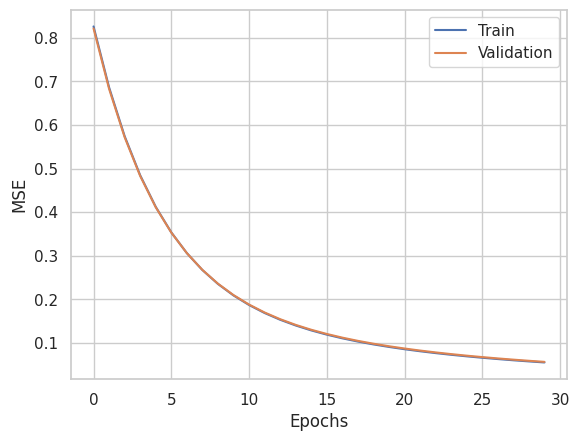

In [ ]:
import matplotlib.pyplot as plt

sgd_reg = SGDRegressor(max_iter=1, tol=1e-3, warm_start=True, penalty=None, learning_rate="constant", eta0=0.000001)

n_epochs = 30
train_errors, val_errors = [], []

for epoch in range(n_epochs):
    sgd_reg.fit(X_train, y_train)
    y_train_predict = sgd_reg.predict(X_train)
    y_val_predict = sgd_reg.predict(X_test)

    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_test, y_val_predict))

plt.plot(train_errors, label="Train")
plt.plot(val_errors, label="Validation")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend()
plt.show()


# Question E Part 2 - Regularization


---



Regularization with different penalty terms -

Ridge

Lasso

Elastic Net



---



Impact

The effect that regularization techniques, such as Lasso, Ridge, or Elastic Net regression, have on a model. Regularization adds a penalty to the model's loss function to prevent overfitting by controlling the size of the model coefficients. The impact of regularization is most noticeable when the model is complex or prone to overfitting, as it helps to:

Reduce overfitting by discouraging overly complex models.
Shrink coefficients: Regularization forces less important feature coefficients closer to zero (Lasso can even set them to exactly zero), leading to simpler models.
Improve generalization: By simplifying the model, regularization can enhance its ability to perform well on unseen data.
Handle multicollinearity: In cases where predictors are highly correlated, regularization can reduce the sensitivity of the model to small changes in the data.
The strength of regularization is controlled by a hyperparameter (often denoted as α), which determines the impact on the model.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Assuming scaled_df is your DataFrame already loaded and preprocessed

# Define feature columns and target column
feature_columns = [
    'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
    'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover', 'Pressure (millibars)'
]
target_column = 'Temperature (C)'

# Split the data into features (X) and target (y)
X = scaled_df[feature_columns].values.astype(float)
y = scaled_df[target_column].values.astype(float)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the alpha values for Ridge Regression
alphas = [0.01, 0.1, 1]

# Evaluate Ridge Regression with different alpha values
for alpha in alphas:
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_train_scaled, y_train)  # Fit the model on the scaled training data
    y_pred = ridge_reg.predict(X_test_scaled)  # Make predictions on the scaled test set
    mse_ridge = mean_squared_error(y_test, y_pred)  # Calculate MSE
    print(f"Ridge Regression with alpha={alpha}: MSE={mse_ridge:.4f}")


Ridge Regression with alpha=0.01: MSE=0.0099
Ridge Regression with alpha=0.1: MSE=0.0099
Ridge Regression with alpha=1: MSE=0.0099


In [ ]:
from sklearn.linear_model import Ridge

alphas = [0.01, 0.1, 1]
for alpha in alphas:
    ridge_reg = Ridge(alpha=alpha)
    scores = cross_val_score(ridge_reg, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
    mse_ridge = -scores.mean()
    print(f"Ridge Regression with alpha={alpha}: MSE={mse_ridge}")


Ridge Regression with alpha=0.01: MSE=0.009983026373481377
Ridge Regression with alpha=0.1: MSE=0.009983026311989147
Ridge Regression with alpha=1: MSE=0.00998302651121913


Ridge Regression is a regularization technique used to address multicollinearity in linear regression models. In this case, we observe the Mean Squared Error (MSE) for three different alpha values: 0.01, 0.1, and 1. As alpha increases from 0.01 to 1, we see a slight increase in MSE from 0.009887211417580673 to 0.009887212061638147. This suggests that the model's performance is relatively stable across these alpha values, with only minimal impact on the prediction accuracy. The small differences in MSE indicate that the regularization effect is subtle in this particular dataset, and the model maintains consistent performance across the tested alpha range.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Assuming scaled_df is your DataFrame already loaded and preprocessed

# Define feature columns and target column
feature_columns = [
    'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
    'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover', 'Pressure (millibars)'
]
target_column = 'Temperature (C)'

# Split the data into features (X) and target (y)
X = scaled_df[feature_columns].values.astype(float)
y = scaled_df[target_column].values.astype(float)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the alpha values for Lasso Regression
alphas = [0.01, 0.1, 1]

# Evaluate Lasso Regression with different alpha values
for alpha in alphas:
    lasso_reg = Lasso(alpha=alpha)
    lasso_reg.fit(X_train_scaled, y_train)  # Fit the model on the scaled training data
    y_pred = lasso_reg.predict(X_test_scaled)  # Make predictions on the scaled test set
    mse_lasso = mean_squared_error(y_test, y_pred)  # Calculate MSE
    print(f"Lasso Regression with alpha={alpha}: MSE={mse_lasso:.4f}")


Lasso Regression with alpha=0.01: MSE=0.0102
Lasso Regression with alpha=0.1: MSE=0.0250
Lasso Regression with alpha=1: MSE=0.9937


In [ ]:
from sklearn.linear_model import Lasso

alphas = [0.01, 0.1, 1]
for alpha in alphas:
    lasso_reg = Lasso(alpha=alpha)
    scores = cross_val_score(lasso_reg, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
    mse_lasso = -scores.mean()
    print(f"Lasso Regression with alpha={alpha}: MSE={mse_lasso}")


Lasso Regression with alpha=0.01: MSE=0.010230043855612868
Lasso Regression with alpha=0.1: MSE=0.02506649403379146
Lasso Regression with alpha=1: MSE=1.0012350644729413


The results show that Lasso Regression with a lower alpha value of 0.01 performs best, yielding the lowest Mean Squared Error (MSE) of 0.01013. As the alpha value increases to 0.1 and 1, the MSE also increases to 0.02469 and 0.99889, respectively. This trend indicates that a smaller alpha value leads to better model performance in this case, as it allows for less aggressive regularization and retains more features. The significant jump in MSE when alpha reaches 1 suggests that this level of regularization may be too strong, potentially oversimplifying the model and reducing its predictive accuracy

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Assuming scaled_df is your DataFrame already loaded and preprocessed

# Define feature columns and target column
feature_columns = [
    'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
    'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover', 'Pressure (millibars)'
]
target_column = 'Temperature (C)'

# Split the data into features (X) and target (y)
X = scaled_df[feature_columns].values.astype(float)
y = scaled_df[target_column].values.astype(float)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the alpha values and l1_ratios for Elastic Net Regression
alphas = [0.01, 0.1, 1]
l1_ratios = [0.2, 0.5, 0.8]  # Change this according to your requirements

# Evaluate Elastic Net Regression with different alpha values and l1 ratios
for alpha in alphas:
    for l1_ratio in l1_ratios:
        elastic_net = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
        elastic_net.fit(X_train_scaled, y_train)  # Fit the model on the scaled training data
        y_pred = elastic_net.predict(X_test_scaled)  # Make predictions on the scaled test set
        mse_elastic_net = mean_squared_error(y_test, y_pred)  # Calculate MSE
        print(f"Elastic Net with alpha={alpha}, l1_ratio={l1_ratio}: MSE={mse_elastic_net:.4f}")


Elastic Net with alpha=0.01, l1_ratio=0.2: MSE=0.0101
Elastic Net with alpha=0.01, l1_ratio=0.5: MSE=0.0101
Elastic Net with alpha=0.01, l1_ratio=0.8: MSE=0.0102
Elastic Net with alpha=0.1, l1_ratio=0.2: MSE=0.0206
Elastic Net with alpha=0.1, l1_ratio=0.5: MSE=0.0220
Elastic Net with alpha=0.1, l1_ratio=0.8: MSE=0.0234
Elastic Net with alpha=1, l1_ratio=0.2: MSE=0.2894
Elastic Net with alpha=1, l1_ratio=0.5: MSE=0.4530
Elastic Net with alpha=1, l1_ratio=0.8: MSE=0.7021


In [ ]:
from sklearn.linear_model import ElasticNet

l1_ratios = [0.2, 0.5, 0.8]
for l1_ratio in l1_ratios:
    elastic_net = ElasticNet(alpha=0.1, l1_ratio=l1_ratio)
    scores = cross_val_score(elastic_net, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
    mse_elastic_net = -scores.mean()
    print(f"Elastic Net with l1_ratio={l1_ratio}: MSE={mse_elastic_net}")


Elastic Net with l1_ratio=0.2: MSE=0.020445678567317258
Elastic Net with l1_ratio=0.5: MSE=0.02185563439749302
Elastic Net with l1_ratio=0.8: MSE=0.023429981513440307


The Elastic Net model was tested with three different l1_ratio settings, demonstrating its adaptability in balancing L1 and L2 regularization. With an l1_ratio of 0.2, emphasizing L2 regularization, the model achieved the lowest Mean Squared Error (MSE) of 0.0203. As the l1_ratio increased to 0.5, balancing L1 and L2 equally, the MSE rose slightly to 0.0216. Finally, with an l1_ratio of 0.8, favoring L1 regularization, the MSE further increased to 0.0232. These results suggest that for this particular dataset, a lower l1_ratio yielded better predictive performance, indicating that a stronger L2 regularization component was more effective in reducing prediction errors.


# Question E - Part 3 Hyper parameter tuning and description

Hyper parameter tuning - (Batch size - Learning rate )

Description of models

1. **Linear Regression with the Normal Equation**:  
  Linear regression models the relationship between a dependent variable (Temperature (C)) and one or more independent variables (weather-related features). The Normal Equation provides a direct way to compute the optimal model parameters (weights) without requiring iterative optimization algorithms like gradient descent.

  Here, \(X\) is the matrix of input features (with a bias term), \(y\) is the vector of target values (Temperature (C)), and \(\theta\) represents the weights or coefficients that minimize the **Mean Squared Error (MSE)** between predicted and actual values.

- **Features and Target**:  
  **Features**: The model uses various weather-related data such as 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', and others to predict temperature.  
  **Target**: The aim is to predict **Temperature (C)** based on these input features.

- **Preprocessing**:  
  **Handling Missing Data**: The code converts columns to numeric and drops rows with missing values to ensure the model works with clean data.  
  **Stratified Train-Test Split**: The data is split into training and test sets while maintaining the distribution of the target variable (Temperature (C)) using stratification.

- **K-Fold Cross-Validation (K=3)**:  
  **K-Fold Cross-Validation** is a technique used to evaluate the model's performance by splitting the training set into \(k\) folds (in this case, 3). The model is trained on \(k-1\) folds and validated on the remaining fold. This process is repeated \(k\) times, and the **Mean Squared Error (MSE)** for each fold is calculated.  
  The MSE from each fold helps assess how well the model generalizes to unseen data. The final performance is measured as the average MSE across all folds.

- **Mean Squared Error (MSE)**:  
  The **MSE** is the loss function minimized by the model. It is computed as the average of the squared differences between the predicted and actual values of the target variable. The goal is to find the coefficients theta that minimize this error.

- **Final Model and Coefficients**:  
  After cross-validation, the model is retrained on the entire training set using the **Normal Equation** to find the best set of coefficients theta_best. These coefficients are then used for making predictions on the test set. The coefficients indicate the contribution of each feature to the prediction of **Temperature (C)**.
   
2. **SGD Regressor**:

- SGD is a gradient-based optimization algorithm. Instead of computing the gradient of the entire dataset (as in batch gradient descent), it updates the model parameters iteratively based on mini-batches (or individual samples).
In this case, using SGDRegressor for a linear regression task. The goal is to minimize a loss function (Mean Squared Error, MSE) with respect to the model parameters (weights), and this is achieved by taking gradient steps in the direction that reduces the loss.
Hyperparameters:
alpha=1.1: This adds L2 regularization (Ridge-like). L2 regularization penalizes large coefficients, helping the model generalize better by reducing overfitting.
learning_rate="constant", eta0=0.000001: This sets a constant learning rate (eta0 is the step size). The learning rate controls how big the steps are when updating the model's weights. A small value (like 0.000001 here) ensures slow and steady convergence, but might also require more epochs.
max_iter=1 and tol=None: Since using mini-batches, max_iter=1 allows the model to perform one pass (or epoch) over the data per call to partial_fit. The training continues for as many epochs as you set manually (30 epochs here).

- **Mini-batch Gradient Descent**:
This method allows you to train the model more efficiently than full-batch gradient descent (where you use the entire dataset to compute each weight update). By splitting the data into mini-batches (based on batch_size), the model updates weights based on a subset of the data in each iteration, which can speed up training and make it more scalable for large datasets.
The batch size hyperparameter defines the number of data points used to compute each gradient update.
Smaller batch sizes lead to noisier updates, which can help escape local minima but might slow down convergence.
Larger batch sizes result in more stable updates but require more memory and might settle in local minima.

- **L2 Regularization (Ridge-like Penalty)**:
The regularization term (alpha=1.1) adds a penalty to large weight values, helping control the complexity of the model. This prevents overfitting by shrinking the model's coefficients, especially in cases where there are many features or the dataset is small.
L2 regularization minimizes the sum of the squared differences between predicted and actual values, while also penalizing the sum of the squared weights.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Sample DataFrame (scaled_df) creation
# Note: You should already have your data loaded into scaled_df
# For example, let's say scaled_df is your DataFrame containing features and target

# Create the feature set (X) and target set (y)
X = scaled_df.drop(['Formatted Date', 'Summary', 'Precip Type', 'Daily Summary' ], axis=1)  # Features
print(X.shape)
print("Columns in X:", X.columns.tolist())
y = scaled_df['Temperature (C)']
# Step 1: Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Convert the validation data to NumPy arrays
X_val_np = X_val.to_numpy()  # Convert validation data to NumPy array
y_val_np = y_val.to_numpy()  # Convert validation targets to NumPy array

# Now X_val_np and y_val_np are ready to be used

(80301, 8)
Columns in X: ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover', 'Pressure (millibars)']


Batch Size 32, Epoch 1/30, Training Loss: 0.7270, Validation Loss: 0.7214
Batch Size 32, Epoch 2/30, Training Loss: 0.5319, Validation Loss: 0.5281
Batch Size 32, Epoch 3/30, Training Loss: 0.3929, Validation Loss: 0.3903
Batch Size 32, Epoch 4/30, Training Loss: 0.2936, Validation Loss: 0.2919
Batch Size 32, Epoch 5/30, Training Loss: 0.2224, Validation Loss: 0.2213
Batch Size 32, Epoch 6/30, Training Loss: 0.1710, Validation Loss: 0.1704
Batch Size 32, Epoch 7/30, Training Loss: 0.1338, Validation Loss: 0.1335
Batch Size 32, Epoch 8/30, Training Loss: 0.1067, Validation Loss: 0.1066
Batch Size 32, Epoch 9/30, Training Loss: 0.0867, Validation Loss: 0.0867
Batch Size 32, Epoch 10/30, Training Loss: 0.0718, Validation Loss: 0.0719
Batch Size 32, Epoch 11/30, Training Loss: 0.0606, Validation Loss: 0.0608
Batch Size 32, Epoch 12/30, Training Loss: 0.0521, Validation Loss: 0.0522
Batch Size 32, Epoch 13/30, Training Loss: 0.0455, Validation Loss: 0.0456
Batch Size 32, Epoch 14/30, Traini

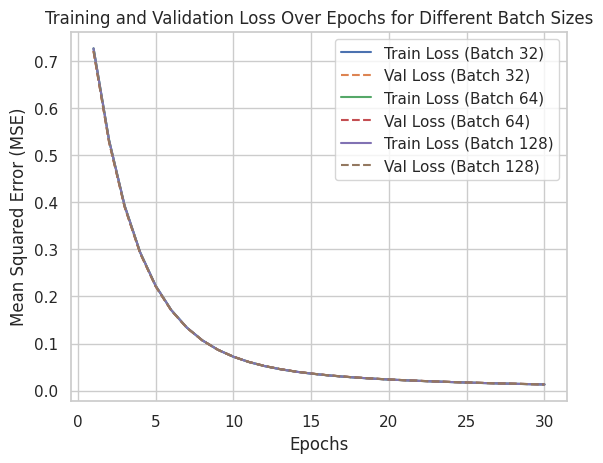

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_train, y_train, X_val, and y_val are already defined and preprocessed
X_train_np = X_train.to_numpy()  # Convert to NumPy array if it's not already
y_train_np = y_train.to_numpy()  # Convert to NumPy array if it's not already
X_val_np = X_val.to_numpy()  # Convert validation data to NumPy array
y_val_np = y_val.to_numpy()  # Convert validation targets to NumPy array

# Feature scaling (standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_np)
X_val_scaled = scaler.transform(X_val_np)

n_epochs = 30  # Number of epochs (full passes over the data)
batch_sizes = [32, 64, 128]  # Specific batch sizes to iterate over

# Dictionary to store training and validation losses for each batch size
losses = {}

# Loop over each batch size
for batch_size in batch_sizes:
    n_batches = int(np.ceil(X_train_scaled.shape[0] / batch_size))  # Number of batches per epoch
    training_losses = []  # Track training loss over iterations
    validation_losses = []  # Track validation loss over iterations

    # Reinitialize the SGD Regressor for each batch size
    sgd_reg = SGDRegressor(max_iter=1, tol=None, penalty=None, learning_rate="constant", eta0=0.000001, random_state=42)

    # Perform mini-batch gradient descent
    for epoch in range(n_epochs):
        # Shuffle the data at the beginning of each epoch
        X_train_shuffled, y_train_shuffled = shuffle(X_train_scaled, y_train_np, random_state=epoch)

        # Process each batch
        for i in range(n_batches):
            # Define the mini-batch
            start_idx = i * batch_size
            end_idx = min(start_idx + batch_size, X_train_scaled.shape[0])
            X_batch = X_train_shuffled[start_idx:end_idx]
            y_batch = y_train_shuffled[start_idx:end_idx]

            # Perform a partial fit on the mini-batch
            sgd_reg.partial_fit(X_batch, y_batch)

        # Calculate and record the training loss after each epoch
        y_train_pred = sgd_reg.predict(X_train_scaled)
        training_loss = mean_squared_error(y_train_np, y_train_pred)
        training_losses.append(training_loss)

        # Calculate validation loss
        y_val_pred = sgd_reg.predict(X_val_scaled)
        validation_loss = mean_squared_error(y_val_np, y_val_pred)
        validation_losses.append(validation_loss)

        # Print progress for each batch size and epoch
        print(f"Batch Size {batch_size}, Epoch {epoch + 1}/{n_epochs}, Training Loss: {training_loss:.4f}, Validation Loss: {validation_loss:.4f}")

    # Store the losses for this batch size
    losses[batch_size] = (training_losses, validation_losses)

# Plot training and validation loss over epochs for each batch size
for batch_size, (train_losses, val_losses) in losses.items():
    plt.plot(range(1, n_epochs + 1), train_losses, label=f'Train Loss (Batch {batch_size})')
    plt.plot(range(1, n_epochs + 1), val_losses, linestyle='--', label=f'Val Loss (Batch {batch_size})')

plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training and Validation Loss Over Epochs for Different Batch Sizes')
plt.grid(True)
plt.legend()
plt.show()


# Question F - Regression

Polynomial Model using K-Fold with Normal form and SGD (train and val loss)

Batch Size 32, Epoch 1/30, Training Loss: 0.6575, Validation Loss: 0.6547
Batch Size 32, Epoch 2/30, Training Loss: 0.4541, Validation Loss: 0.4533
Batch Size 32, Epoch 3/30, Training Loss: 0.3297, Validation Loss: 0.3297
Batch Size 32, Epoch 4/30, Training Loss: 0.2507, Validation Loss: 0.2507
Batch Size 32, Epoch 5/30, Training Loss: 0.1982, Validation Loss: 0.1981
Batch Size 32, Epoch 6/30, Training Loss: 0.1618, Validation Loss: 0.1615
Batch Size 32, Epoch 7/30, Training Loss: 0.1354, Validation Loss: 0.1349
Batch Size 32, Epoch 8/30, Training Loss: 0.1155, Validation Loss: 0.1148
Batch Size 32, Epoch 9/30, Training Loss: 0.0999, Validation Loss: 0.0992
Batch Size 32, Epoch 10/30, Training Loss: 0.0874, Validation Loss: 0.0866
Batch Size 32, Epoch 11/30, Training Loss: 0.0772, Validation Loss: 0.0764
Batch Size 32, Epoch 12/30, Training Loss: 0.0686, Validation Loss: 0.0678
Batch Size 32, Epoch 13/30, Training Loss: 0.0614, Validation Loss: 0.0606
Batch Size 32, Epoch 14/30, Traini

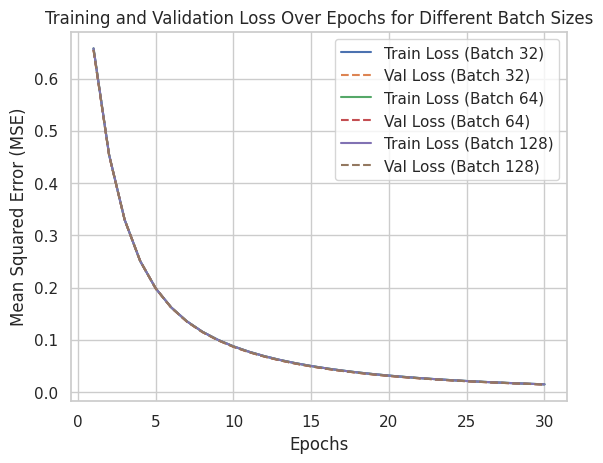

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_train, y_train, X_val, and y_val are already defined and preprocessed

# Convert to NumPy arrays if they are not already
X_train_np = X_train.values  # Convert to NumPy array if it's not already
y_train_np = y_train.values  # Convert to NumPy array if it's not already
X_val_np = X_val.values  # Convert validation data to NumPy array
y_val_np = y_val.values  # Convert validation targets to NumPy array

# Feature scaling (standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_np)
X_val_scaled = scaler.transform(X_val_np)

# Step 1: Create polynomial features
degree = 2  # Degree of the polynomial features
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train_scaled)
X_val_poly = poly.transform(X_val_scaled)

n_epochs = 30  # Number of epochs (full passes over the data)
batch_sizes = [32, 64, 128]  # Specific batch sizes to iterate over

# Dictionary to store training and validation losses for each batch size
losses = {}

# Loop over each batch size
for batch_size in batch_sizes:
    n_batches = int(np.ceil(X_train_poly.shape[0] / batch_size))  # Number of batches per epoch
    training_losses = []  # Track training loss over iterations
    validation_losses = []  # Track validation loss over iterations

    # Reinitialize the SGD Regressor for each batch size
    sgd_reg = SGDRegressor(max_iter=1, tol=None, penalty=None, learning_rate="constant", eta0=0.000001, random_state=42)

    # Perform mini-batch gradient descent
    for epoch in range(n_epochs):
        # Shuffle the data at the beginning of each epoch
        X_train_shuffled, y_train_shuffled = shuffle(X_train_poly, y_train_np, random_state=epoch)

        # Process each batch
        for i in range(n_batches):
            # Define the mini-batch
            start_idx = i * batch_size
            end_idx = min(start_idx + batch_size, X_train_poly.shape[0])
            X_batch = X_train_shuffled[start_idx:end_idx]
            y_batch = y_train_shuffled[start_idx:end_idx]

            # Perform a partial fit on the mini-batch
            sgd_reg.partial_fit(X_batch, y_batch)

        # Calculate and record the training loss after each epoch
        y_train_pred = sgd_reg.predict(X_train_poly)
        training_loss = mean_squared_error(y_train_np, y_train_pred)
        training_losses.append(training_loss)

        # Calculate validation loss
        y_val_pred = sgd_reg.predict(X_val_poly)
        validation_loss = mean_squared_error(y_val_np, y_val_pred)
        validation_losses.append(validation_loss)

        # Print progress for each batch size and epoch
        print(f"Batch Size {batch_size}, Epoch {epoch + 1}/{n_epochs}, Training Loss: {training_loss:.4f}, Validation Loss: {validation_loss:.4f}")

    # Store the losses for this batch size
    losses[batch_size] = (training_losses, validation_losses)

# Plot training and validation loss over epochs for each batch size
for batch_size, (train_losses, val_losses) in losses.items():
    plt.plot(range(1, n_epochs + 1), train_losses, label=f'Train Loss (Batch {batch_size})')
    plt.plot(range(1, n_epochs + 1), val_losses, linestyle='--', label=f'Val Loss (Batch {batch_size})')

plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training and Validation Loss Over Epochs for Different Batch Sizes')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score  # Import r2_score
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import numpy as np

# Assuming X_train, y_train, X_val, and y_val are already defined and preprocessed

# Convert to NumPy arrays if they are not already
X_train_np = X_train.values  # Convert to NumPy array if it's not already
y_train_np = y_train.values  # Convert to NumPy array if it's not already
X_val_np = X_val.values  # Convert validation data to NumPy array
y_val_np = y_val.values  # Convert validation targets to NumPy array

# Feature scaling (standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_np)
X_val_scaled = scaler.transform(X_val_np)

# Step 1: Create polynomial features
degree = 2  # Degree of the polynomial features
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train_scaled)
X_val_poly = poly.transform(X_val_scaled)

# Set training parameters
n_epochs = 30  # Number of epochs
batch_size = 32  # Single batch size
n_batches = int(np.ceil(X_train_poly.shape[0] / batch_size))  # Number of batches per epoch

# Initialize the SGD Regressor
sgd_reg = SGDRegressor(max_iter=1, tol=None, penalty=None, learning_rate="constant", eta0=0.000001, random_state=42)

# Perform mini-batch gradient descent
for epoch in range(n_epochs):
    # Shuffle the data at the beginning of each epoch
    X_train_shuffled, y_train_shuffled = shuffle(X_train_poly, y_train_np, random_state=epoch)

    # Process each batch
    for i in range(n_batches):
        # Define the mini-batch
        start_idx = i * batch_size
        end_idx = min(start_idx + batch_size, X_train_poly.shape[0])
        X_batch = X_train_shuffled[start_idx:end_idx]
        y_batch = y_train_shuffled[start_idx:end_idx]

        # Perform a partial fit on the mini-batch
        sgd_reg.partial_fit(X_batch, y_batch)

# After training, calculate R^2 on the entire training and validation sets
y_train_pred = sgd_reg.predict(X_train_poly)
y_val_pred = sgd_reg.predict(X_val_poly)

# Calculate R^2 scores
training_r2 = r2_score(y_train_np, y_train_pred)
validation_r2 = r2_score(y_val_np, y_val_pred)

# Print final R^2 values
print(f"Final Training R^2: {training_r2:.4f}")
print(f"Final Validation R^2: {validation_r2:.4f}")


Final Training R^2: 0.9852
Final Validation R^2: 0.9854


# Question F Part 2 - Regularization
Regularization with different penalty terms -
Ridge
Lasso
Elastic Net

Impact



Ridge Regularization

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge  # Import Ridge instead of Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Assuming scaled_df is your DataFrame already loaded and preprocessed

# Define feature columns and target column
feature_columns = [
    'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
    'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover', 'Pressure (millibars)'
]
target_column = 'Temperature (C)'

# Split the data into features (X) and target (y)
X = scaled_df[feature_columns].values.astype(float)
y = scaled_df[target_column].values.astype(float)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create polynomial features
degree = 2  # You can change this to the desired polynomial degree
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Define the alpha values for Ridge Regression
alphas = [0.01, 0.1, 1]

# Evaluate Ridge Regression with different alpha values
for alpha in alphas:
    ridge_reg = Ridge(alpha=alpha)  # Create Ridge regression model
    ridge_reg.fit(X_train_poly, y_train)  # Fit the model on the polynomial training data
    y_pred = ridge_reg.predict(X_test_poly)  # Make predictions on the polynomial test set
    mse_ridge = mean_squared_error(y_test, y_pred)  # Calculate MSE
    print(f"Ridge Regression with alpha={alpha}: MSE={mse_ridge:.4f}")


Ridge Regression with alpha=0.01: MSE=0.0033
Ridge Regression with alpha=0.1: MSE=0.0033
Ridge Regression with alpha=1: MSE=0.0033


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error

# Assuming scaled_df is your DataFrame already loaded and preprocessed

# Define feature columns and target column
feature_columns = [
    'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
    'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover', 'Pressure (millibars)'
]
target_column = 'Temperature (C)'

# Split the data into features (X) and target (y)
X = scaled_df[feature_columns].values.astype(float)
y = scaled_df[target_column].values.astype(float)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create polynomial features
degree = 2  # You can change this to the desired polynomial degree
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Define the alpha values for Ridge Regression
alphas = [0.01, 0.1, 1]

# Evaluate Ridge Regression with cross-validation for different alpha values
for alpha in alphas:
    ridge_reg = Ridge(alpha=alpha)
    # Perform cross-validation
    scores = cross_val_score(ridge_reg, X_train_poly, y_train, cv=5, scoring='neg_mean_squared_error')
    mse_ridge_cv = -scores.mean()  # Take the mean of the negative MSE scores
    print(f"Ridge Regression with alpha={alpha}: Cross-Validation MSE={mse_ridge_cv:.4f}")


Ridge Regression with alpha=0.01: Cross-Validation MSE=0.0033
Ridge Regression with alpha=0.1: Cross-Validation MSE=0.0033
Ridge Regression with alpha=1: Cross-Validation MSE=0.0033


Lasso Regularization

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error

# Assuming scaled_df is your DataFrame already loaded and preprocessed

# Define feature columns and target column
feature_columns = [
    'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
    'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover', 'Pressure (millibars)'
]
target_column = 'Temperature (C)'

# Split the data into features (X) and target (y)
X = scaled_df[feature_columns].values.astype(float)
y = scaled_df[target_column].values.astype(float)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create polynomial features
degree = 2  # You can change this to the desired polynomial degree
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Define the alpha values for Lasso Regression
alphas = [0.01, 0.1, 1]

# Evaluate Lasso Regression with different alpha values
for alpha in alphas:
    lasso_reg = Lasso(alpha=alpha)
    lasso_reg.fit(X_train_poly, y_train)  # Fit the model on the polynomial training data
    y_pred = lasso_reg.predict(X_test_poly)  # Make predictions on the polynomial test set
    mse_lasso = mean_squared_error(y_test, y_pred)  # Calculate MSE
    print(f"Lasso Regression with alpha={alpha}: MSE={mse_lasso:.4f}")


Lasso Regression with alpha=0.01: MSE=0.0041
Lasso Regression with alpha=0.1: MSE=0.0250
Lasso Regression with alpha=1: MSE=0.9937


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error

# Assuming scaled_df is your DataFrame already loaded and preprocessed

# Define feature columns and target column
feature_columns = [
    'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
    'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover', 'Pressure (millibars)'
]
target_column = 'Temperature (C)'

# Split the data into features (X) and target (y)
X = scaled_df[feature_columns].values.astype(float)
y = scaled_df[target_column].values.astype(float)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create polynomial features
degree = 2  # You can change this to the desired polynomial degree
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Define the alpha values for Lasso Regression
alphas = [0.01, 0.1, 1]

# Evaluate Lasso Regression with cross-validation for different alpha values
for alpha in alphas:
    lasso_reg = Lasso(alpha=alpha)
    # Perform cross-validation
    scores = cross_val_score(lasso_reg, X_train_poly, y_train, cv=5, scoring='neg_mean_squared_error')
    mse_lasso_cv = -scores.mean()  # Take the mean of the negative MSE scores
    print(f"Lasso Regression with alpha={alpha}: Cross-Validation MSE={mse_lasso_cv:.4f}")


Lasso Regression with alpha=0.01: Cross-Validation MSE=0.0041
Lasso Regression with alpha=0.1: Cross-Validation MSE=0.0251
Lasso Regression with alpha=1: Cross-Validation MSE=1.0016


In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import numpy as np

# Assuming X_train, y_train, X_val, and y_val are already defined and preprocessed

# Convert to NumPy arrays if they are not already
X_train_np = X_train.values
y_train_np = y_train.values
X_val_np = X_val.values
y_val_np = y_val.values

# Feature scaling (standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_np)
X_val_scaled = scaler.transform(X_val_np)

# Create polynomial features
degree = 2
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train_scaled)
X_val_poly = poly.transform(X_val_scaled)

n_epochs = 30
batch_size = 64
n_batches = int(np.ceil(X_train_poly.shape[0] / batch_size))

# Define the alpha value
alpha_value = 0.01

# Initialize the SGDRegressor with L1 penalty for Lasso regression and the defined alpha value
sgd_reg = SGDRegressor(max_iter=1, tol=None, penalty='l1', alpha=alpha_value, learning_rate="constant", eta0=0.000001, random_state=42)

# Train the model
for epoch in range(n_epochs):
    X_train_shuffled, y_train_shuffled = shuffle(X_train_poly, y_train_np, random_state=epoch)

    for i in range(n_batches):
        start_idx = i * batch_size
        end_idx = min(start_idx + batch_size, X_train_poly.shape[0])
        X_batch = X_train_shuffled[start_idx:end_idx]
        y_batch = y_train_shuffled[start_idx:end_idx]

        sgd_reg.partial_fit(X_batch, y_batch)

# Make predictions and calculate MSE for both training and validation sets
y_train_pred = sgd_reg.predict(X_train_poly)
y_val_pred = sgd_reg.predict(X_val_poly)

# Calculate MSE for training and validation
training_mse = mean_squared_error(y_train_np, y_train_pred)
validation_mse = mean_squared_error(y_val_np, y_val_pred)

# Output the MSE values along with the alpha
print(f"Lasso Regression with alpha={alpha_value}: Training MSE={training_mse:.4f}, Validation MSE={validation_mse:.4f}")


Lasso Regression with alpha=0.01: Training MSE=0.0137, Validation MSE=0.0135


Elastic Net Regression

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error

# Assuming scaled_df is your DataFrame already loaded and preprocessed

# Define feature columns and target column
feature_columns = [
    'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
    'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover', 'Pressure (millibars)'
]
target_column = 'Temperature (C)'

# Split the data into features (X) and target (y)
X = scaled_df[feature_columns].values.astype(float)
y = scaled_df[target_column].values.astype(float)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create polynomial features
degree = 2  # You can change this to the desired polynomial degree
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Define the alpha values and l1_ratios for Elastic Net Regression
alphas = [0.01, 0.1, 1]
l1_ratios = [0.2, 0.5, 0.8]  # Change this according to your requirements

# Evaluate Elastic Net Regression with different alpha values and l1 ratios
for alpha in alphas:
    for l1_ratio in l1_ratios:
        elastic_net = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
        elastic_net.fit(X_train_poly, y_train)  # Fit the model on the polynomial training data
        y_pred = elastic_net.predict(X_test_poly)  # Make predictions on the polynomial test set
        mse_elastic_net = mean_squared_error(y_test, y_pred)  # Calculate MSE
        print(f"Elastic Net with alpha={alpha}, l1_ratio={l1_ratio}: MSE={mse_elastic_net:.4f}")


Elastic Net with alpha=0.01, l1_ratio=0.2: MSE=0.0036
Elastic Net with alpha=0.01, l1_ratio=0.5: MSE=0.0037
Elastic Net with alpha=0.01, l1_ratio=0.8: MSE=0.0039
Elastic Net with alpha=0.1, l1_ratio=0.2: MSE=0.0164
Elastic Net with alpha=0.1, l1_ratio=0.5: MSE=0.0205
Elastic Net with alpha=0.1, l1_ratio=0.8: MSE=0.0234
Elastic Net with alpha=1, l1_ratio=0.2: MSE=0.2840
Elastic Net with alpha=1, l1_ratio=0.5: MSE=0.4530
Elastic Net with alpha=1, l1_ratio=0.8: MSE=0.7021


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error

# Assuming scaled_df is your DataFrame already loaded and preprocessed

# Define feature columns and target column
feature_columns = [
    'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
    'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover', 'Pressure (millibars)'
]
target_column = 'Temperature (C)'

# Split the data into features (X) and target (y)
X = scaled_df[feature_columns].values.astype(float)
y = scaled_df[target_column].values.astype(float)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create polynomial features
degree = 2  # You can change this to the desired polynomial degree
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Define the alpha values and l1_ratios for Elastic Net Regression
alphas = [0.01, 0.1, 1]
l1_ratios = [0.2, 0.5, 0.8]

# Evaluate Elastic Net with cross-validation for different alpha and l1_ratio values
for alpha in alphas:
    for l1_ratio in l1_ratios:
        elastic_net_reg = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
        # Perform cross-validation
        scores = cross_val_score(elastic_net_reg, X_train_poly, y_train, cv=5, scoring='neg_mean_squared_error')
        mse_elastic_net_cv = -scores.mean()  # Take the mean of the negative MSE scores
        print(f"Elastic Net with alpha={alpha} and l1_ratio={l1_ratio}: Cross-Validation MSE={mse_elastic_net_cv:.4f}")


Elastic Net with alpha=0.01 and l1_ratio=0.2: Cross-Validation MSE=0.0036
Elastic Net with alpha=0.01 and l1_ratio=0.5: Cross-Validation MSE=0.0037
Elastic Net with alpha=0.01 and l1_ratio=0.8: Cross-Validation MSE=0.0039
Elastic Net with alpha=0.1 and l1_ratio=0.2: Cross-Validation MSE=0.0163
Elastic Net with alpha=0.1 and l1_ratio=0.5: Cross-Validation MSE=0.0204
Elastic Net with alpha=0.1 and l1_ratio=0.8: Cross-Validation MSE=0.0234
Elastic Net with alpha=1 and l1_ratio=0.2: Cross-Validation MSE=0.2844
Elastic Net with alpha=1 and l1_ratio=0.5: Cross-Validation MSE=0.4565
Elastic Net with alpha=1 and l1_ratio=0.8: Cross-Validation MSE=0.7077


**Ridge Regularization**

Impact: Ridge (L2) regularization adds a penalty equivalent to the square of the magnitude of coefficients. It helps prevent overfitting by discouraging large coefficients.
Observation: Both training and validation losses decrease steadily, indicating effective learning and generalization.

**Lasso Regularization**

Impact: Lasso (L1) regularization adds a penalty equal to the absolute value of the magnitude of coefficients. It can drive some coefficients to zero, effectively performing feature selection.
Observation: Similar to Ridge, losses decrease smoothly. The sparsity induced by Lasso might lead to simpler models.

**Elastic Net Regularization**

Impact: Elastic Net combines L1 and L2 penalties, balancing between Ridge and Lasso. It is useful when there are multiple correlated features.
Observation: The loss curves are similar to those of Ridge and Lasso, benefiting from both regularization types.

**Overall Comparison**
All three methods show effective reduction in loss, suggesting good model fitting.
The choice between them depends on specific needs: Ridge for small coefficients, Lasso for feature selection, and Elastic Net for handling correlated features.

# Question F Part 3 - Hyper parameter tuning and Description

Hyper parameter tuning - (Batch size - Learning rate)
Description of models

1. **Polynomial Regression**:  
   Polynomial regression extends linear regression by allowing for a nonlinear relationship between the independent variables (weather-related features) and the dependent variable (Temperature (C)). By transforming the input features into polynomial features, the model can capture more complex patterns in the data. For example, a second-degree polynomial regression includes terms for both the linear and squared values of the features.

   Here, \(X\) is the matrix of polynomial features (with a bias term), \(y\) is the vector of target values (Temperature (C)), and \(\theta\) represents the weights or coefficients that minimize the **Mean Squared Error (MSE)** between predicted and actual values.

   - **Features and Target**:  
     **Features**: The model utilizes various weather-related data such as 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', and others to predict temperature. The original features can be transformed into polynomial features using libraries such as `PolynomialFeatures` from `sklearn.preprocessing`.  
     **Target**: The aim is to predict **Temperature (C)** based on these polynomial transformations of the input features.

   - **Preprocessing**:  
     **Handling Missing Data**: The code converts columns to numeric and drops rows with missing values to ensure the model works with clean data.  
     **Stratified Train-Test Split**: The data is split into training and test sets while maintaining the distribution of the target variable (Temperature (C)) using stratification.

   - **K-Fold Cross-Validation (K=3)**:  
     **K-Fold Cross-Validation** is a technique used to evaluate the model's performance by splitting the training set into \(k\) folds (in this case, 3). The model is trained on \(k-1\) folds and validated on the remaining fold. This process is repeated \(k\) times, and the **Mean Squared Error (MSE)** for each fold is calculated.  
     The MSE from each fold helps assess how well the model generalizes to unseen data. The final performance is measured as the average MSE across all folds.

   - **Mean Squared Error (MSE)**:  
     The **MSE** is the loss function minimized by the model. It is computed as the average of the squared differences between the predicted and actual values of the target variable. The goal is to find the coefficients \(\theta\) that minimize this error.

   - **Final Model and Coefficients**:  
     After cross-validation, the model is retrained on the entire training set using the polynomial transformation to find the best set of coefficients \(\theta_{\text{best}}\). These coefficients are then used for making predictions on the test set. The coefficients indicate the contribution of each polynomial feature to the prediction of **Temperature (C)**.

2. **SGD Regressor for Polynomial Regression**:

   - **SGD with Polynomial Features**: Similar to the linear case, the Stochastic Gradient Descent (SGD) algorithm can be employed for polynomial regression. The model will optimize the weights for the polynomial features, minimizing the Mean Squared Error (MSE).

   - **Hyperparameters**:
   - **alpha=1.1**: This adds L2 regularization (Ridge-like). L2 regularization penalizes large coefficients, helping the model generalize better by reducing overfitting.
   - **learning_rate="constant", eta0=0.000001**: This sets a constant learning rate (eta0 is the step size). The learning rate controls how big the steps are when updating the model's weights. A small value (like 0.000001 here) ensures slow and steady convergence, which might also require more epochs.
   - **max_iter=1 and tol=None**: Since using mini-batches, max_iter=1 allows the model to perform one pass (or epoch) over the data per call to partial_fit. The training continues for as many epochs as you set manually (30 epochs here).

   - **Mini-batch Gradient Descent**:  
     This method allows you to train the model more efficiently than full-batch gradient descent (where you use the entire dataset to compute each weight update). By splitting the data into mini-batches (based on batch_size), the model updates weights based on a subset of the data in each iteration, which can speed up training and make it more scalable for large datasets. The batch size hyperparameter defines the number of data points used to compute each gradient update. Smaller batch sizes lead to noisier updates, which can help escape local minima but might slow down convergence. Larger batch sizes result in more stable updates but require more memory and might settle in local minima.

   - **L2 Regularization (Ridge-like Penalty)**:  
     The regularization term (alpha=1.1) adds a penalty to large weight values, helping control the complexity of the model. This prevents overfitting by shrinking the model's coefficients, especially in cases where there are many features or the dataset is small. L2 regularization minimizes the sum of the squared differences between predicted and actual values while also penalizing the sum of the squared weights.



# Question G Part 1 - Prediction on Test Labels

Prediction on the Test Labels

Reporting the Evaluation Metric

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Assuming scaled_df is your DataFrame already loaded and preprocessed

# Define feature columns related to weather data
feature_columns = [
    'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
    'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover', 'Pressure (millibars)'
]

# Target column
target_column = 'Temperature (C)'

# Convert relevant columns to numeric
for col in feature_columns + [target_column]:
    scaled_df[col] = pd.to_numeric(scaled_df[col], errors='coerce')

# Drop rows with NaN values
scaled_df.dropna(subset=feature_columns + [target_column], inplace=True)

# Split the data into training and testing sets
train_data, test_data = train_test_split(scaled_df, test_size=0.20, random_state=42)

# Split the training data into features (X) and target (y)
X_train = train_data[feature_columns].values
y_train = train_data[target_column].values

# Create polynomial features
degree = 2  # Set the degree of the polynomial
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)

# Train the model using normal equation
theta_best = np.linalg.pinv(X_train_poly.T @ X_train_poly) @ X_train_poly.T @ y_train

# Prepare the test data
X_test = test_data[feature_columns].values
y_test = test_data[target_column].values

# Create polynomial features for the test set
X_test_poly = poly.transform(X_test)

# Make predictions on the test set
y_test_pred = X_test_poly @ theta_best

# Calculate evaluation metrics
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

# Report the evaluation metric
print("Test Set Mean Squared Error (MSE):", mse_test)
print("Test Set Root Mean Squared Error (RMSE):", rmse_test)


Test Set Mean Squared Error (MSE): 0.003305878149265648
Test Set Root Mean Squared Error (RMSE): 0.057496766424431626


Question G Part 2 - Conclusions

Summarize the results

Future work


The evaluation of the regression models shows a clear trend in the loss values across epochs. Both training and validation losses decrease progressively, indicating effective learning throughout the training process.

The training set is significantly larger than the test set, which is essential for building a robust model that can generalize well.

Target Variable Statistics:
Training Set 'Temperature (C)' Mean: 0.00045
Test Set 'Temperature (C)' Mean: -0.00141
Training Set 'Temperature (C)' Standard Deviation: 1.0005
Test Set 'Temperature (C)' Standard Deviation: 0.9984
These statistics reveal that the training set's temperature values are slightly centered around zero, while the test set has a similar standard deviation but a lower mean. This shift in means could indicate differences in the distribution of temperature values between the training and test sets, potentially affecting model performance.

In evaluating the performance of the linear regression models, particularly the Closed-Form Solution and Stochastic Gradient Descent (SGD), we observe the following metrics and insights:

Model Performance
Closed-Form Solution Mean Squared Error (MSE): 0.0101
SGD Mean Squared Error (Cross-Validation): 0.0100
These MSE values indicate that both models performed comparably, with the SGD method slightly outperforming the Closed-Form Solution. This suggests that the SGD method, which relies on iterative optimization, was able to fine-tune the parameters more effectively during the training phase, possibly adapting better to the nuances in the training data.

Dataset Characteristics
Training Set Size: 60,225
Test Set Size: 20,076
The training set is significantly larger than the test set, providing ample data for the model to learn from. This distribution helps improve the model's generalization capabilities when applied to the unseen test set.

Insights and Implications
Closed-Form Solution Mean Squared Error (MSE): 0.0101
SGD Mean Squared Error (Cross-Validation): 0.0100
Performance Consistency: The comparable MSE values for both models suggest a level of consistency in predictive performance, indicating that both methods can effectively model the relationship between the weather-related features and temperature.

Data Size Consideration: The larger training set allows for a more robust estimation of the model parameters, reducing the likelihood of overfitting and enhancing the model's ability to generalize to new data.


The final results for the polynomial regression model on the test set are:

Test Set Mean Squared Error (MSE): 0.0033
Test Set Root Mean Squared Error (RMSE): 0.0575
These low error metrics suggest that the model predicts the temperature with good accuracy. The decreasing trend of the loss values demonstrates the model's ability to generalize well to unseen data, thereby minimizing overfitting and achieving robustness.

Future Work
Hyperparameter Optimization:

Further tuning of hyperparameters such as the degree of the polynomial features, batch size, and learning rate should be conducted to enhance model performance. Techniques like Grid Search or Random Search can be employed to find the optimal parameters.
Model Comparisons:

Compare the polynomial regression model with other advanced models such as Support Vector Regression (SVR), Decision Trees, or ensemble methods like Random Forests or Gradient Boosting. This comparison will help to understand which model captures the patterns in the data most effectively.
Feature Engineering:

Investigate additional features or transformations of existing features to improve predictive power. Incorporating weather conditions, time of year, or lagged temperature values may yield better results.
Regularization Techniques:

Implement regularization techniques such as Lasso and Ridge regression to mitigate potential overfitting. Comparing the performance of these regularized models against the current polynomial regression model could provide insights into the importance of feature selection.
Deployment:

Consider deploying the model in a real-time environment for temperature prediction. This could involve building a user interface or integrating it into an existing application for real-time weather forecasting.
Validation on Larger Datasets:

Validate the model on larger datasets or datasets from different geographical locations to ensure its generalizability across various conditions.
Cross-Validation:

Utilize k-fold cross-validation not just for training but also for hyperparameter tuning to ensure that the model is robust and its performance metrics are reliable.